In [97]:
import numpy as np
from itertools import combinations

In [98]:
from collections import deque
from matplotlib import pyplot as plt
import Field
import Game
import Agent
import Cards
from utils import * 
from importlib import reload
from random import choice, shuffle

reload(Field)
reload(Game)
reload(Agent)
reload(Cards)

<module 'Cards' from '/home/clark/Apps/durakula/game/Cards.py'>

In [99]:
numplayers = 4
durak_game = Game.DurakGame(numplayers, 'small')

In [100]:
for p in durak_game.players:
    print(p.player_mode)

MODE_DEFEND
MODE_WAIT
MODE_WAIT
MODE_ATTACK


In [101]:
print(durak_game.playing_field)

--- Playing Field ---
Drawing DurakDeck: --- Card Collection ---
Cards: S7,S8,H8,C0,D6,S6,S4,C1,H0,D3,H7,C2.
Size: 12
-----------------------

0:--- Card Collection ---
Cards: D2,D4,D8,C7,C8,H3.
Size: 6
-----------------------

1:--- Card Collection ---
Cards: D0,C4,C6,H5,H6,S5.
Size: 6
-----------------------

2:--- Card Collection ---
Cards: D1,D5,D7,C5,S2,S3.
Size: 6
-----------------------

3:--- Card Collection ---
Cards: C3,H1,H2,H4,S0,S1.
Size: 6
-----------------------

Trump suit is Clubs
---------------------



In [102]:
players_on_attack = [p.player_id for p in durak_game.playing_field.attack_players()]
p_att_idx = players_on_attack[0]
print(durak_game.players[p_att_idx].get_deck_from_hand())

--- Card Collection ---
Cards: C3,H1,H2,H4,S0,S1.
Size: 6
-----------------------



In [103]:
p_def_idx = durak_game.playing_field.defend_player().player_id
print(durak_game.players[p_def_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D2,D4,D8,C7,C8,H3.
Size: 6
-----------------------



In [104]:
durak_game.playing_field.first_attack

True

In [105]:
attack_moves = durak_game.playing_field.get_legal_moves(p_att_idx)
attack_moves

[((0, 0),),
 ((0, 1),),
 ((1, 3),),
 ((2, 1),),
 ((2, 2),),
 ((2, 4),),
 ((0, 1), (2, 1))]

In [106]:
random_move = choice(durak_game.playing_field.get_legal_moves(p_att_idx))
print(random_move)

((0, 1), (2, 1))


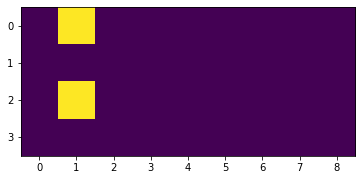

In [107]:
durak_game.playing_field.execute_move(random_move, p_att_idx)
plt.imshow(durak_game.playing_field.attacks)

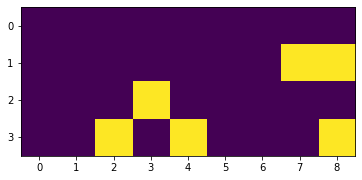

In [108]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [109]:
defend_actions = durak_game.playing_field.get_legal_moves(p_def_idx)
print(defend_actions)

[((21, 19),)]


In [110]:
random_defend = choice(defend_actions)
print(random_defend)

((21, 19),)


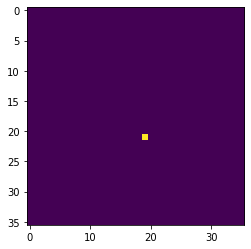

In [111]:
durak_game.get_next_state(random_defend, p_def_idx)
plt.imshow(durak_game.playing_field.field)

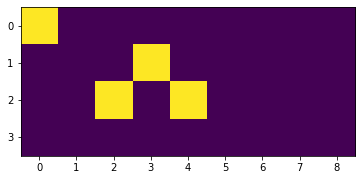

In [112]:
plt.imshow(durak_game.players[p_att_idx].hand)

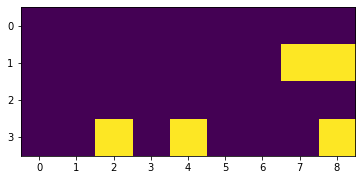

In [113]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [96]:
choice(durak_game.playing_field.attack_players()).player_id

2

In [115]:
defend_id = durak_game.playing_field.defend_player().player_id
print(defend_id)

0


In [120]:
durak_game.players[0].attack()
durak_game.players[1].defend()

In [121]:
print(defend_id)

0


In [123]:
d = Cards.DurakDeck()
d.cards

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [129]:
initial_attack_ids = [p.player_id for p in durak_game.playing_field.attack_players()]

In [131]:
attack_ids = [p.player_id for p in durak_game.players if p.is_attack() and p.player_id != initial_attack_ids[0]]
attack_ids

[2, 3]